In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [32]:
DATA_PATH = 'data/'
RESULTS_PATH = 'results/'
INPUT_DATE = '2023-08-19'

In [33]:
data_df = pd.read_csv(DATA_PATH + 'BTCUSDT-trades-' + INPUT_DATE + '.csv')

In [34]:
data_df = data_df.set_axis(['trade Id', 'price', 'qty', 'quoteQty',	'time', 'isBuyerMaker1', 'isBuyerMaker2'], axis=1)
data_df

,trade Id,price,qty,quoteQty,time,isBuyerMaker1,isBuyerMaker2
0,3195189946,26054.00,0.00157,40.904780,1692403200007,False,True
1,3195189947,26053.99,0.00310,80.767369,1692403200007,True,True
2,3195189948,26053.99,0.00096,25.011830,1692403200007,True,True
3,3195189949,26053.99,0.00531,138.346687,1692403200007,True,True
4,3195189950,26053.99,0.00059,15.371854,1692403200007,True,True
...,...,...,...,...,...,...,...
615758,3195805704,26100.00,0.00094,24.534000,1692489599995,True,True
615759,3195805705,26100.00,0.00223,58.203000,1692489599997,True,True
615760,3195805706,26100.00,0.00049,12.789000,1692489599997,True,True
615761,3195805707,26100.01,0.00048,12.528005,1692489599998,False,True


In [35]:
data_df['time'] = data_df['time'].apply(lambda x: datetime.fromtimestamp(x/1000))
data_df

,trade Id,price,qty,quoteQty,time,isBuyerMaker1,isBuyerMaker2
0,3195189946,26054.00,0.00157,40.904780,2023-08-19 03:00:00.007,False,True
1,3195189947,26053.99,0.00310,80.767369,2023-08-19 03:00:00.007,True,True
2,3195189948,26053.99,0.00096,25.011830,2023-08-19 03:00:00.007,True,True
3,3195189949,26053.99,0.00531,138.346687,2023-08-19 03:00:00.007,True,True
4,3195189950,26053.99,0.00059,15.371854,2023-08-19 03:00:00.007,True,True
...,...,...,...,...,...,...,...
615758,3195805704,26100.00,0.00094,24.534000,2023-08-20 02:59:59.995,True,True
615759,3195805705,26100.00,0.00223,58.203000,2023-08-20 02:59:59.997,True,True
615760,3195805706,26100.00,0.00049,12.789000,2023-08-20 02:59:59.997,True,True
615761,3195805707,26100.01,0.00048,12.528005,2023-08-20 02:59:59.998,False,True


In [36]:
data_df.set_index('time', inplace=True)
data_df = data_df.resample('1T').first()
data_df = data_df.reset_index()

In [37]:
data_df

,time,trade Id,price,qty,quoteQty,isBuyerMaker1,isBuyerMaker2
0,2023-08-19 03:00:00,3195189946,26054.00,0.00157,40.904780,False,True
1,2023-08-19 03:01:00,3195190594,26050.26,0.00154,40.117400,True,True
2,2023-08-19 03:02:00,3195190987,26058.00,0.00015,3.908700,True,True
3,2023-08-19 03:03:00,3195191940,26058.00,0.00047,12.247260,False,True
4,2023-08-19 03:04:00,3195192285,26062.91,0.00400,104.251640,True,True
...,...,...,...,...,...,...,...
1435,2023-08-20 02:55:00,3195804616,26090.65,0.00051,13.306232,True,True
1436,2023-08-20 02:56:00,3195804848,26090.44,0.00274,71.487806,True,True
1437,2023-08-20 02:57:00,3195804993,26090.44,0.00096,25.046822,True,True
1438,2023-08-20 02:58:00,3195805191,26090.44,0.00133,34.700285,True,True


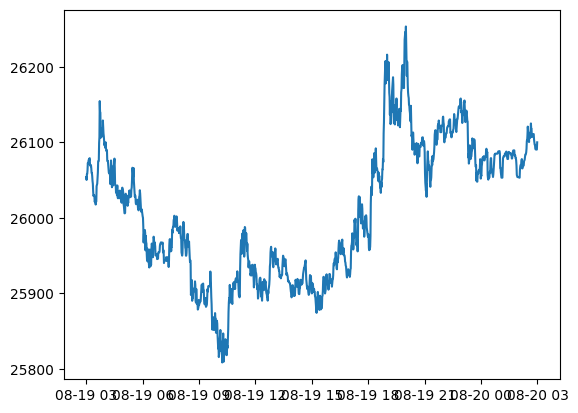

In [38]:
plt.plot( data_df['time'], data_df['price'])

In [39]:
data_df[['time', 'price']].to_parquet(RESULTS_PATH + 'labeled-2023-08-19.parquet', index=False)